In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt

from mylib.descstats import MyPCA
from mylib.descstats import MyHier

# 1. Import et traitement du dataframe principal

In [2]:
with open('data/part1.pkl', 'rb') as f:
    my_unpickler = pickle.Unpickler(f)
    main_df = my_unpickler.load()

main_df = (
            main_df
                .copy()
    
                # Set country column as index
                .set_index('country')
    
                # Mean imputation
                .fillna(main_df.mean())
)
    
main_df.head(10)

,pop_evol_ratio,kcal_total_capita_day,proteins_total_capita_day,proteins_animal_ratio
country,,,,
Arménie,-0.019433,2924.0,90.06,0.480235
Afghanistan,0.321682,2087.0,58.26,0.209749
Albanie,-0.020377,3188.0,111.37,0.533537
Algérie,0.188013,3293.0,91.92,0.271867
Angola,0.392387,2474.0,57.27,0.321285
Antigua-et-Barbuda,0.111111,2416.0,83.49,0.680680
Argentine,0.091546,3226.0,102.60,0.652437
Australie,0.169899,3278.0,106.26,0.674572
Autriche,0.043355,3770.0,106.20,0.591902


# 3. Classification hiérarchique

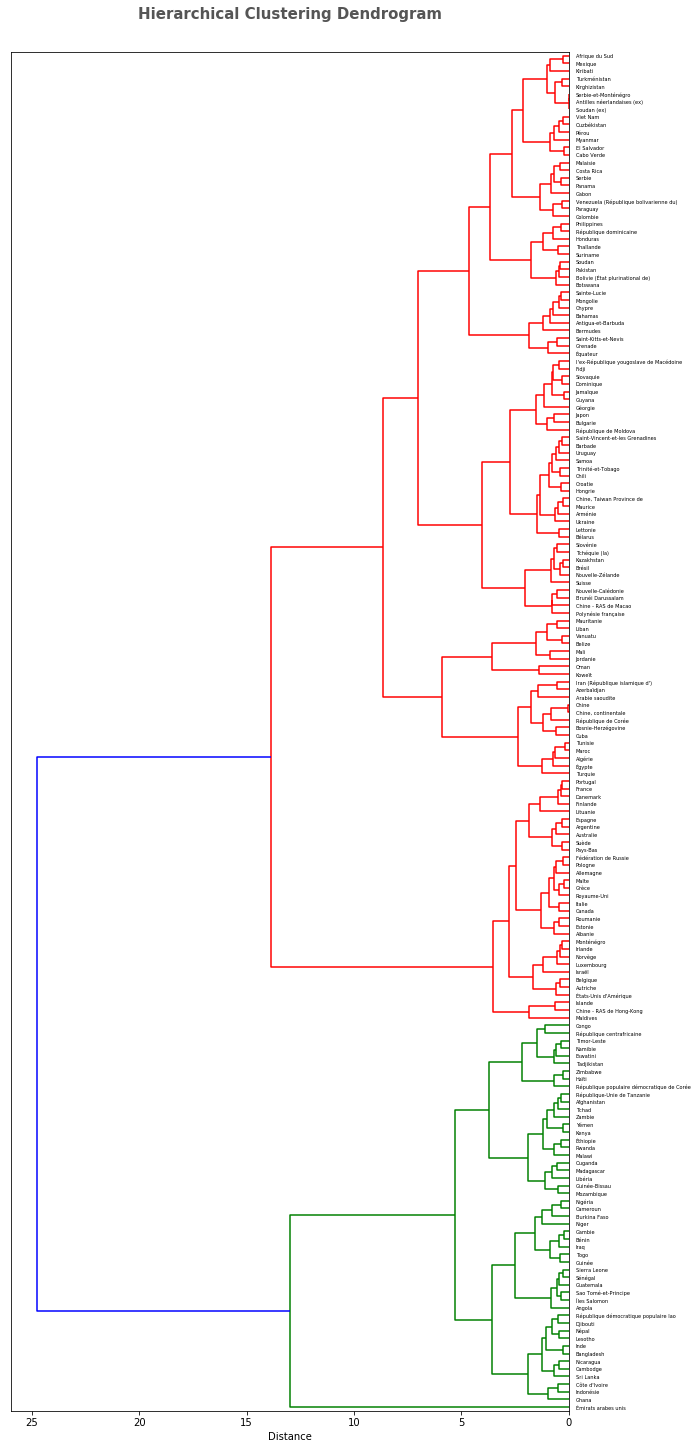

In [3]:
# Hierarchical clustering
myhier = MyHier(main_df)
myhier.dendrogram(save_image='dendrogram')

# Compute 5 clusters from the hierarchical clustering
clusters = myhier.clusters(5)
centroids = myhier.centroids()
centroids_names = myhier.centroids_names

## Observation des clusters

In [4]:
for i in range(1,6):
    print(f"Group {i}:")
    print(", ".join(main_df.index[clusters == i].sort_values()))
    print(" ")

Group 1:
Afghanistan, Angola, Bangladesh, Burkina Faso, Bénin, Cambodge, Cameroun, Congo, Côte d'Ivoire, Djibouti, Eswatini, Gambie, Ghana, Guatemala, Guinée, Guinée-Bissau, Haïti, Inde, Indonésie, Iraq, Kenya, Lesotho, Libéria, Madagascar, Malawi, Mozambique, Namibie, Nicaragua, Niger, Nigéria, Népal, Ouganda, Rwanda, République centrafricaine, République démocratique populaire lao, République populaire démocratique de Corée, République-Unie de Tanzanie, Sao Tomé-et-Principe, Sierra Leone, Sri Lanka, Sénégal, Tadjikistan, Tchad, Timor-Leste, Togo, Yémen, Zambie, Zimbabwe, Éthiopie, Îles Salomon
 
Group 2:
Émirats arabes unis
 
Group 3:
Albanie, Allemagne, Argentine, Australie, Autriche, Belgique, Canada, Chine - RAS de Hong-Kong, Danemark, Espagne, Estonie, Finlande, France, Fédération de Russie, Grèce, Irlande, Islande, Israël, Italie, Lituanie, Luxembourg, Maldives, Malte, Monténégro, Norvège, Pays-Bas, Pologne, Portugal, Roumanie, Royaume-Uni, Suède, États-Unis d'Amérique
 
Group 4

## Renommage des centroïds

In [5]:
# Rename the centroids
centroids_names = [
    'Afrique',
    'Émirats arabes unis',
    'Occident',
    'Moyen Orient',
    'Autre'
]

# Rename the complete clusters list
def rename_centroids(x):
    if x == 1:
        return 'Afrique'
    elif x == 2:
        return 'Émirats arabes unis'
    elif x == 3:
        return 'Occident'
    elif x == 4:
        return 'Moyen Orient'
    elif x == 5:
        return 'Autre'
    else:
        return None
    
clusters = pd.DataFrame(clusters)[0].apply(lambda x: rename_centroids(x)).tolist()

## ACP

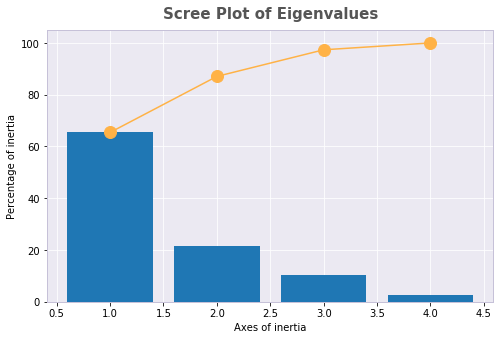

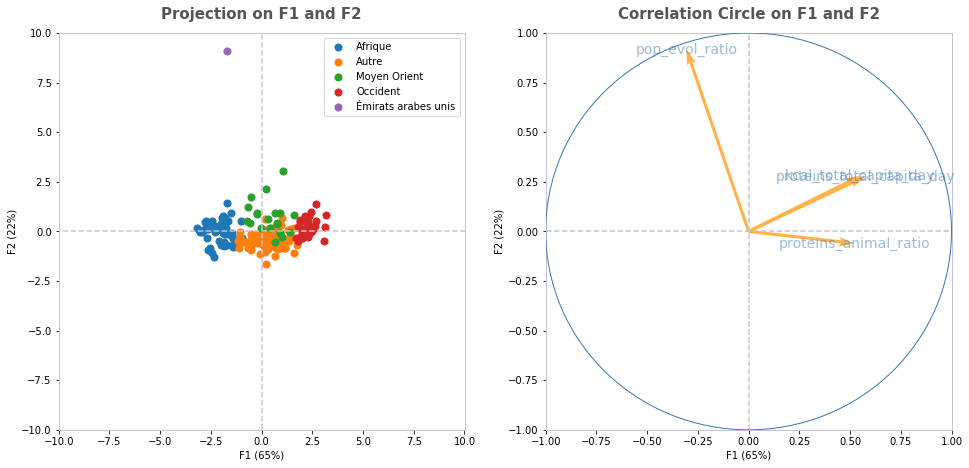

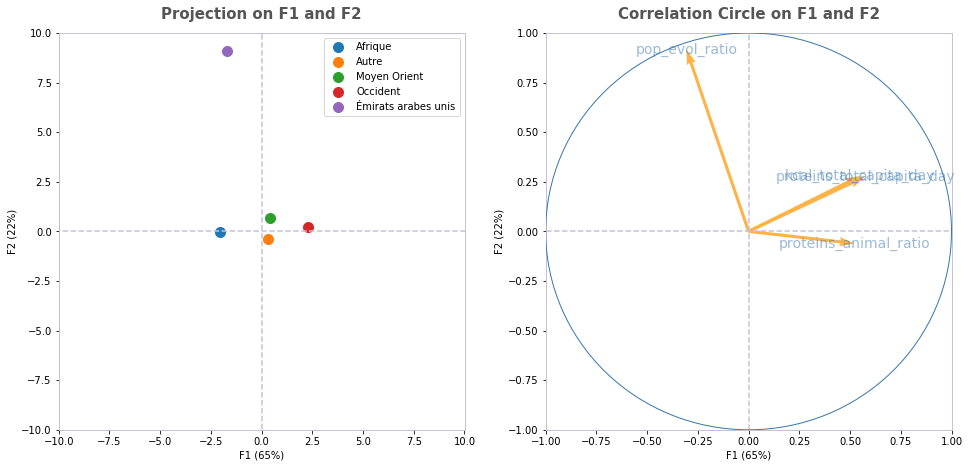

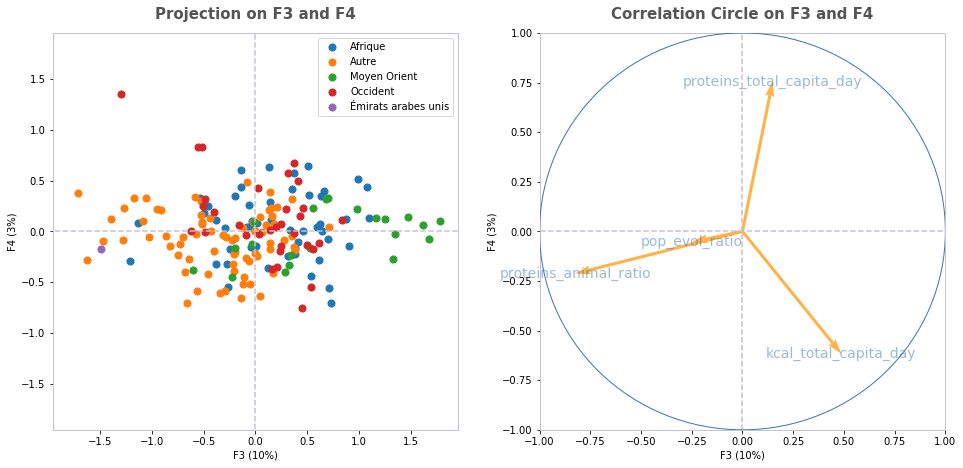

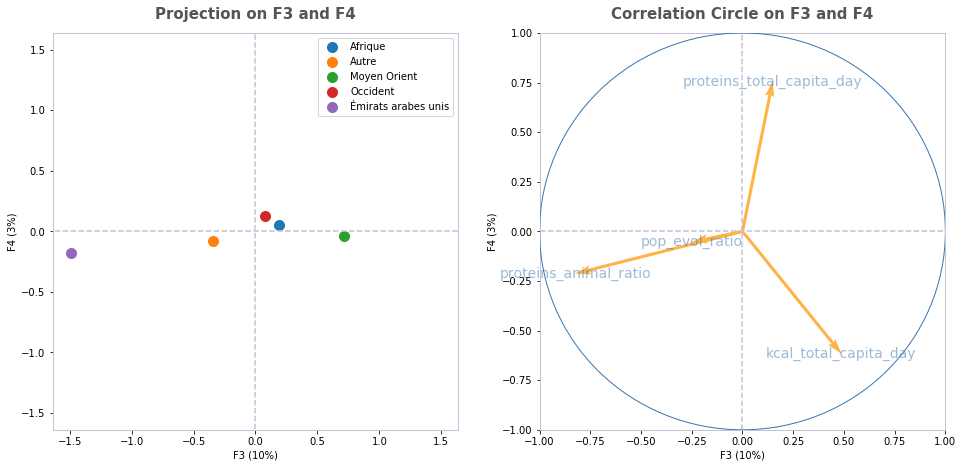

In [6]:
# Compute a PCA
mypca = MyPCA(main_df, n_components=4, clusters=clusters, centroids=centroids, centroids_names=centroids_names)

# Plot the screeplot of eigenvalues
mypca.scree()

# Plot the PCA with the clustering colors
mypca.scattercircle(1, 2, labelcircle=True)
mypca.scattercircle(1, 2, labelcircle=True, data_projected='centroids', markersize=100)
mypca.scattercircle(3, 4, labelcircle=True)
mypca.scattercircle(3, 4, labelcircle=True, data_projected='centroids', markersize=100)

## Interprétations

La première composante permet de bien résumer nos trois indicateurs liés à la nutrition. On peut donc considérer que plus sa valeur est grande pour un pays donné, plus ce pays est consommateur de nourriture.

D'ailleurs, le classement hierarchique fait ressortir des groupes dans ce sens là. Le groupe n°3 (Occident) est le "mieux nourri".

En ce qui concerne le groupe "Moyen Orient" et "Autre", c'est surtout l'évolution de la population qui a permis de le dinstinguer.

---

## Export des centroïds (centrés réduits + composantes principales)

In [7]:
# Scaled centroïds dataframe
dfc1 = pd.DataFrame(centroids, columns=main_df.columns, index=centroids_names)
display(dfc1)

# Projected centroïds dataframe
centroids_projected = [
    'F1',
    'F2',
    'F3',
    'F4'
]
dfc2 = pd.DataFrame(mypca.centroids_projected, columns=centroids_projected, index=centroids_names)
display(dfc2)

# Merging both
dfc3 = dfc1.merge(dfc2, how='left', left_index=True, right_index=True)
display(dfc3)

# CSV export
dfc3.to_csv('Livrables/centroids.csv')

,pop_evol_ratio,kcal_total_capita_day,proteins_total_capita_day,proteins_animal_ratio
Afrique,0.567338,-1.084114,-1.119997,-1.245184
Émirats arabes unis,9.245178,0.984575,1.172029,-0.179442
Occident,-0.533187,1.278521,1.478191,1.089696
Moyen Orient,0.324725,0.787077,0.495818,-0.406728
Autre,-0.369856,-0.057030,-0.039007,0.487969


,F1,F2,F3,F4
Afrique,-2.064565,-0.016345,0.190129,0.056642
Émirats arabes unis,-1.709935,9.092587,-1.489578,-0.175200
Occident,2.285913,0.210348,0.077564,0.125426
Moyen Orient,0.406785,0.679689,0.712054,-0.041581
Autre,0.314142,-0.395675,-0.343947,-0.078342


,pop_evol_ratio,kcal_total_capita_day,proteins_total_capita_day,proteins_animal_ratio,F1,F2,F3,F4
Afrique,0.567338,-1.084114,-1.119997,-1.245184,-2.064565,-0.016345,0.190129,0.056642
Émirats arabes unis,9.245178,0.984575,1.172029,-0.179442,-1.709935,9.092587,-1.489578,-0.175200
Occident,-0.533187,1.278521,1.478191,1.089696,2.285913,0.210348,0.077564,0.125426
Moyen Orient,0.324725,0.787077,0.495818,-0.406728,0.406785,0.679689,0.712054,-0.041581
Autre,-0.369856,-0.057030,-0.039007,0.487969,0.314142,-0.395675,-0.343947,-0.078342


## Ajout des clusters et de la composante principale n°1 sur le dataframe principal

In [8]:
main_df['cluster'] = clusters
main_df['F1'] = mypca.X_projected[:,0]

---

## Résumé des cinq groupes via les moyennes des variables :

In [9]:
# Mean by variable and by cluster
display(main_df.groupby('cluster').mean())

# We already have this result here:
display(myhier.centroids_raw)

# Pop evol of France
main_df.filter(regex='France', axis=0)['pop_evol_ratio'].mean()

,pop_evol_ratio,kcal_total_capita_day,proteins_total_capita_day,proteins_animal_ratio,F1
cluster,,,,,
Afrique,0.258352,2379.680000,59.306800,0.229285,-2.064565
Autre,0.094651,2824.197838,80.626026,0.505290,0.314142
Moyen Orient,0.215974,3189.523810,91.173810,0.362810,0.406785
Occident,0.066122,3402.218750,110.548125,0.601115,2.285913
Émirats arabes unis,1.774117,3275.000000,104.510000,0.399005,-1.709935


array([[2.58351833e-01, 2.37968000e+03, 5.93068000e+01, 2.29285475e-01],
       [1.77411695e+00, 3.27500000e+03, 1.04510000e+02, 3.99004880e-01],
       [6.61221766e-02, 3.40221875e+03, 1.10548125e+02, 6.01115063e-01],
       [2.15974471e-01, 3.18952381e+03, 9.11738095e+01, 3.62809704e-01],
       [9.46514934e-02, 2.82419784e+03, 8.06260263e+01, 5.05290059e-01]])

0.062169574411842454

## Interprétations

Le groupe n°3 performent sur toutes les variables liées à la nutrition. Son évolution de population est d'environ 6,6%. Pour donner un ordre d'idée, la France est à environ 6,2%.

On peut donc focus sur ce troisième groupe.

## Sauvegarde du dataframe

In [10]:
# We save the main_df with clusters in a file
with open('data/part2.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(main_df)

In [11]:
# We export countries and clusters in a CSV file
pd.DataFrame(main_df['cluster']).to_csv('Livrables/pays_clusters.csv')